In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if not os.path.isdir(f'./results'): #Verifica se a pasta já existe e se não existe cria ela com a proxima linha
    os.mkdir(f'./results')
my_path = os.path.abspath(f'./results') # Figures out the absolute path for you in case your working directory moves around.



In [15]:
DRX_file_name = './XRD_cru.xlsx' # colocar o caminho do arquivo, se estiver na mesma pasta do codigo de plotar é só colocar o caminho depois do ./
                                #exemplo: ./dados/DRX1.xlsx

# dados = pd.read_csv(DRX_file_name)
dados = pd.read_excel(DRX_file_name)
fases = dados.loc[:, dados.columns[(dados.columns.get_loc('zero') + 1):dados.columns.get_loc('tick-pos')]].columns

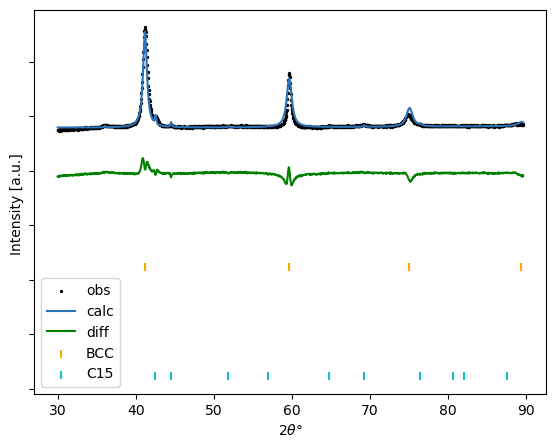

In [17]:
my_file = f'DRX_tratado.png' #muda o nome do arquivo que vai ser salvo


#lista com as possiveis cores: https://matplotlib.org/stable/gallery/color/named_colors.html
cor_obs = 'black'
cor_calc = '#2d73b6'
cor_diff = 'green'
cor_fases = ['orange','tab:cyan','red'] #colocar a mesma quantidade de cores iguais a fases indexadas, separando as cores por virgulas dentro dos colchetes



fig = plt.figure()
        
# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

x_obs = dados.loc[dados["x"] != "--", "x"].astype(float)
y_obs = dados.loc[dados["x"] != "--", "obs"].astype(float)

axes.scatter(x_obs,y_obs,s =2, c=cor_obs, label = 'obs')

##plot calc
x_calc = dados.loc[dados["x"] != "--", "x"].astype(float)
y_calc = dados.loc[dados["x"] != "--", "calc"].astype(float)
axes.plot(x_calc,y_calc,ls ='-',c=cor_calc, label = 'calc')

##plot diff
x_diff = dados.loc[dados["x"] != "--", "x"].astype(float)
y_diff = dados.loc[dados["x"] != "--", "diff"].astype(float)
axes.plot(x_diff,y_diff,ls ='-',c=cor_diff, label = 'diff')

##plot fases
i = min(dados.loc[dados["x"] != "--", "diff"].astype(float)) - 15
for fase,cor in zip(fases,cor_fases):
    
    x_fase = dados.loc[dados[f'{fase}'] != " ",f'{fase}'].astype(float)
    y_position = i
    y_fase =(y_position)*np.ones(len(dados.loc[dados[f'{fase}'] != " ",f'{fase}']))
    axes.scatter(x_fase,y_fase, c=cor, marker= "|", label = f'{fase}')
    i=i-20
    
plt.xlabel(r'2$\theta \degree$')
plt.ylabel(r'Intensity [a.u.] ')
x_min=dados.loc[dados["x"] != "--", "x"].astype(float).min()
x_max=dados.loc[dados["x"] != "--", "x"].astype(float).max()
#plt.xlim([x_min,x_max])
#plt.xticks(np.arange(x_min,x_max+10,10))
plt.legend()
plt.tick_params(labelleft = False)
#fig.savefig(os.path.join(my_path, my_file), dpi=200, bbox_inches='tight')